# Rainfall prediction using Linear Regression

# 1) Cleaning the data

In [1]:
# importing libraries 
import pandas as pd 
import numpy as np 
import sklearn as sk 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 

In [2]:
# อ่านข้อมูลที่เตรียมไว้
data = pd.read_csv('austin_weather.csv')
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
# ลบ features ที่ไม่ต้องการ
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',  
                  'SeaLevelPressureLowInches'], axis = 1) 
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,T


In [4]:
data.shape

(1319, 17)

In [5]:
# some values have 'T' which denotes trace rainfall (row number 6,8,9)
# we need to replace all occurrences of T with 0 
# so that we can use the data in our model 
data = data.replace('T', 0.0)
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.91,10,10,10,13,4,20,0


In [6]:
# the data also contains '-' which indicates no  (row number 176-179)
# or NIL. This means that data is not available 
# we need to replace these values as well. 
data = data.replace('-', 0.0) 

In [7]:
# save the data in a csv file 
data.to_csv('austin_final.csv')

# 2) Scikit-learn’s linear regression model 

In [8]:
# importing libraries 
import pandas as pd 
import numpy as np 
import sklearn as sk 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [9]:
# read the cleaned data 
data = pd.read_csv('austin_final.csv')

In [10]:
# the features or the 'x' values of the data 
# these columns are used to train the model 
# the last column, i.e, precipitation column  
# will serve as the label  
X = data.drop(['PrecipitationSumInches'], axis = 1)

In [11]:
# the output or the label. 
Y = data['PrecipitationSumInches'] 
# reshaping it into a 2-D vector 
Y = Y.values.reshape(-1, 1) 

In [12]:
# consider a random day in the dataset 
# we shall plot a graph and observe this day (798)
day_index = 798
days = [i for i in range(Y.size)]

In [13]:
# initialize a linear regression classifier 
clf = LinearRegression()

In [14]:
# train the classifier with our  
# input data. 
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# give a sample input to test our model 
# this is a 2-D vector that contains values 
# for each column in the dataset. 
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], 
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]]) 
inp = inp.reshape(1, -1)

In [16]:
# print the output. 
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


the precipitation trend graph: 


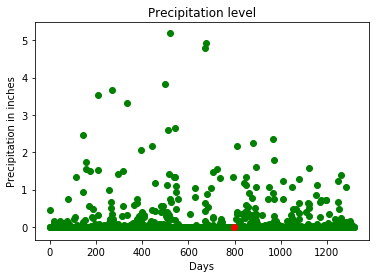

In [17]:
# plot a graph of the precipitation levels 
# versus the total number of days. 
# one day, which is in red, is 
# tracked here. It has a precipitation 
# of approx. 2 inches. 
print("the precipitation trend graph: ") 
plt.scatter(days, Y, color = 'g') 
plt.scatter(days[day_index], Y[day_index], color ='r') 
plt.title("Precipitation level") 
plt.xlabel("Days") 
plt.ylabel("Precipitation in inches") 
plt.show() 

In [18]:
# filter data for displaying
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 
                  'WindAvgMPH'], axis = 1)

In [19]:
x_vis.columns

Index(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
       'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'],
      dtype='object')

In [20]:
x_vis.columns.size

6

Precipitation vs selected attributes graph: 


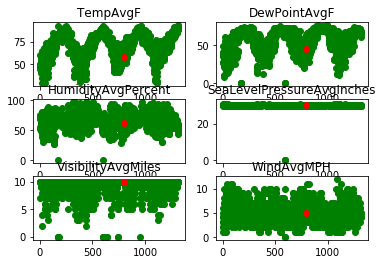

In [21]:
# plot a graph with a few features (x values) 
# against the precipitation or rainfall to observe 
# the trends 
  
print("Precipitation vs selected attributes graph: ")
for i in range(x_vis.columns.size): 
    plt.subplot(3, 2, i + 1) #Add a subplot to the current figure; nrows=3,ncols=2,index=i+1
    #x=days, y=x_vis.columns.values (between 0 and 99)
    plt.scatter(days,
                x_vis[x_vis.columns.values[i][:100]], 
                color = 'g') 
  
    plt.scatter(days[day_index],  
                x_vis[x_vis.columns.values[i]][day_index], 
                color ='r') 
  
    plt.title(x_vis.columns.values[i]) 
  
plt.show()

A day (in red) having precipitation of about 2 inches is tracked across multiple parameters (the same day is tracker across multiple features such as temperature, pressure, etc). 

The x-axis denotes the days and the y-axis denotes the magnitude of the feature such as temperature, pressure, etc. 

From the graph, it can be observed that rainfall can be expected to be high when the temperature is high and humidity is high.